## 2. Implementar un programa que realice las siguientes operaciones con imágenes en formatoraw, pgm, ppm, jpg y una imagen satelital:

##2a. Cargar una imagen de un archivo y desplegarla

In [15]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
import skimage
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage.transform import resize
from sklearn.metrics import accuracy_score

In [16]:
path = "../data/"

In [17]:
file_name = "Vista_satelital_santa_fe.jpg"
im = Image.open(path+file_name)
im.show()

##2b. Guardar una imagen a un archivo.

In [18]:
im.save(path+"testimagen.JPG") 

##2c. Obtener el valor de un pixel en una imagen

In [19]:
im.getpixel((2, 6)) 

(63, 65, 60)

##2d. Copiar una parte de la imagen en otra imagen nueva

In [20]:
###crop = (left, upper, right, lower) 
region = im.crop((10, 10, 300, 259))
region.show()
file_name = "sky.jpg"
new_image = Image.open(path+file_name)
new_image.paste(region, (100,100)) 

##2e. Guardar la imagen cortada con otro nombre

In [21]:
file_name = "imagencortada.JPG"
new_image.save(path+file_name)

## 3. Implementar un programa que marque una region dentro de la imagen e informe la cantidad de pixels de la region y el promedio de los niveles de gris o el promedio del color si es una imagen en color

In [22]:
# Cargamos la imagen
file_name = "/sky.jpg"
im = Image.open(path+file_name)
im.show()

In [23]:
region = im.crop((500,500,600,600))
region.show()
ndepixel = region.size[0]*region.size[1] # Image size, in pixels. The size is given as a 2-tuple (width, height).
ndepixel

10000

In [24]:
if im.mode == "L": # GRIS

  promediogris = sum(region.getdata())/ndepixelgetdata() # Returns the contents of this image as a sequence object containing pixel values. The sequence object is flattened, so that values for line one follow directly after the values of line zero, and so on.
  print("Cantidad de píxeles en la región: ",ndepixel)
  print("Promedio del nivel de gris en la región: ",promediogris)

elif im.mode == "RGB":  # Color

  promedior = sum(region.getdata(band=0)) / ndepixel
  promediog = sum(region.getdata(band=1)) / ndepixel
  promediob = sum(region.getdata(band=2)) / ndepixel
  print("Cantidad de píxeles en la región: ", ndepixel)
  print("Promedio del color en la región (R, G, B): ", (promedior, promediog, promediob))

Cantidad de píxeles en la región:  10000
Promedio del color en la región (R, G, B):  (63.2947, 112.5332, 221.9842)


##4. Implementar un programa que marque una region dentro de una imagen satelital e informe la cantidad de pixels de la region, la cantidad de bandas y el promedio de cada banda dentro de la region

In [25]:
file_name = "LC08_224-078_2018-01-05_RGB.tif"
im = Image.open(path+file_name)
im.show()

In [26]:
region = im.crop((450,20,700,400))
npixels = region.size[0] * region.size[1]
nbands = len(region.getbands())
region.show()

In [27]:
region.getbands()

('R', 'G', 'B', 'A')

In [28]:
averages = [] # Para calcular el promedio de cada banda dentro de la region, se recorre cada banda de la región utilizando un bucle for y se utiliza el metodo getchannel para obtener la banda correspondiente. Luego se utiliza el método getdata para obtener los valores de los píxeles de la banda y se utiliza el metodo mean para calcular el promedio de los valores.
for band in region.getbands(): # getbands() returns a tuple containing the name of each band in this image. For example, getbands on an RGB image returns (“R”, “G”, “B”).
    band_data = np.array(region.getchannel(band).getdata()) # getchannel(channel) returns an image containing a single channel of the source image.
    averages.append(np.mean(band_data))

In [29]:
print("Cantidad de pixeles:",npixels)
print("Cantidad de bandas:",nbands)
for i in range(nbands):  
    print("Promedio de la banda {}: {}".format(i, averages[i]))

Cantidad de pixeles: 95000
Cantidad de bandas: 4
Promedio de la banda 0: 142.1540947368421
Promedio de la banda 1: 137.9438842105263
Promedio de la banda 2: 36.98997894736842
Promedio de la banda 3: 255.0


##5. Dada una imagen satelital separada en bandas, calcular los índices NDVI, NDWI y SVI y mostrarlos como imágenes.

In [30]:
def calculate_ndvi(image_red, image_nir):
    ndvi = (image_nir - image_red) / (image_nir + image_red)
    return ndvi

def calculate_ndwi(image_green, image_nir):
    ndwi = (image_green - image_nir) / (image_green + image_nir)
    return ndwi

def calculate_savi(image_red, image_nir, l):
    savi = ((image_nir - image_red) / (image_nir + image_red + l)) * (1 + l)
    return savi

In [31]:
image_red = cv2.imread(path+'LC08_224-078_2018-01-05_red.tif', cv2.IMREAD_GRAYSCALE).astype(float)[:,324:718] # Las imágenes tienen dos cuadrados negros a los costados, los sacamos.
image_green = cv2.imread(path+'LC08_224-078_2018-01-05_green.tif', cv2.IMREAD_GRAYSCALE).astype(float)[:,324:718]
image_blue = cv2.imread(path+'LC08_224-078_2018-01-05_blue.tif', cv2.IMREAD_GRAYSCALE).astype(float)[:,324:718]
image_nir = cv2.imread(path+'LC08_224-078_2018-01-05_nir.tif', cv2.IMREAD_GRAYSCALE).astype(float)[:,324:718]

In [32]:
ndvi = calculate_ndvi(image_red, image_nir)
ndwi = calculate_ndwi(image_green, image_nir)
l = 0.5
savi = calculate_savi(image_red, image_nir, l)

C:\Users\Bianca\AppData\Local\Temp\ipykernel_12444\590817716.py:2: RuntimeWarning: invalid value encountered in divide
  ndvi = (image_nir - image_red) / (image_nir + image_red)
C:\Users\Bianca\AppData\Local\Temp\ipykernel_12444\590817716.py:6: RuntimeWarning: invalid value encountered in divide
  ndwi = (image_green - image_nir) / (image_green + image_nir)


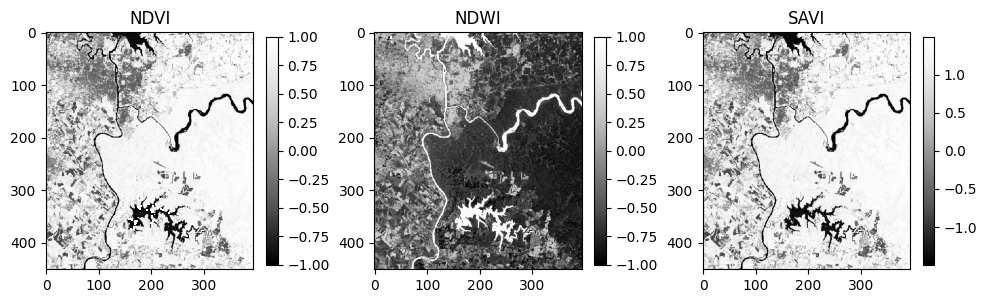

In [33]:
# Mostramos las imágenes resultantes
plt.figure(figsize=(10, 6))

cmap_inverso = matplotlib.colormaps.get_cmap('Greys').reversed()

plt.subplot(1, 3, 1)
plt.imshow(ndvi, cmap=cmap_inverso)
plt.colorbar(shrink=0.4)
plt.title('NDVI')

plt.subplot(1, 3, 2)
plt.imshow(ndwi, cmap=cmap_inverso)
plt.colorbar(shrink=0.4)
plt.title('NDWI')

plt.subplot(1, 3, 3)
plt.imshow(savi, cmap=cmap_inverso)
plt.colorbar(shrink=0.4)
plt.title('SAVI')

plt.tight_layout()
plt.show()

##6. Implementar la función de potencia γ, 0 < γ < 2 y γ ̸ = 1 y aplicarla a la imagen del índice NDVI. Variar el valor de γ para observar los resultados.

Text(0.5, 1.0, 'Gamma = 1.95')

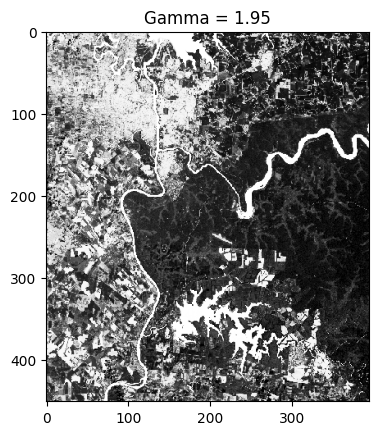

In [34]:
# Definimos el valor de gamma
gamma = 1.95

# Reescalamos la imagen al rango [0,255]
ndvi_reescalado = np.interp(ndvi, (np.nanmin(ndvi), np.nanmax(ndvi)), (0, 255))

# Aplicamos la función de potencia
ndvigamma = np.power(ndvi_reescalado, gamma)

plt.imshow(ndvigamma, cmap='Greys')
plt.title(f'Gamma = {gamma}')

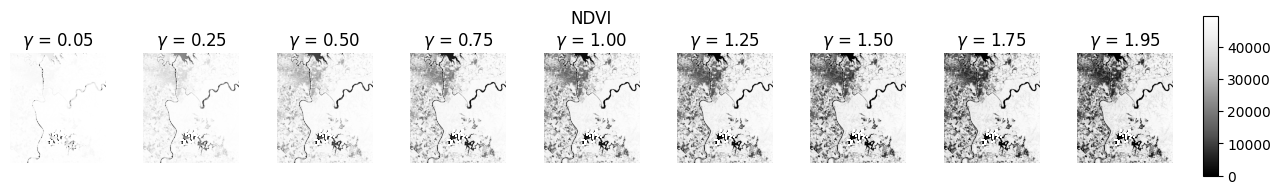

In [35]:
gamma_values = np.array([0.05,0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75,1.95])
ndvi_reescalado = np.interp(ndvi, (np.nanmin(ndvi), np.nanmax(ndvi)), (0, 256))
fig, axes = plt.subplots(1, len(gamma_values), figsize=(15, 5))
fig.subplots_adjust(wspace=0.4)

# Iteramos por los valores de gamma
for i, gamma in enumerate(gamma_values):
    # Aplicamos la función gamma a la imagen
    gamma_image = np.power(ndvi_reescalado, gamma)

    # Graficamos la imagen
    ax = axes[i]
    img = ax.imshow(gamma_image, cmap=cmap_inverso)
    ax.set_title('$\u03B3$ = {:.2f}'.format(gamma))
    ax.axis('off')

    if gamma == 1:
      ax.set_title('NDVI\n$\u03B3$ = {:.2f}'.format(gamma))

# Agregamos una única colorbar compartida
cbar_ax = fig.add_axes([0.92, 0.36, 0.01, 0.32])
fig.colorbar(img, cax=cbar_ax)

# COMENTARIO:
# La imagen se va del rango 0-256 cuando la elevamos a la gamma con gamma mayor a 1
# Pero para el plt.imshow() no importa mucho

##7. Implementar una función que devuelva el negativo de una imagen y aplicarlo a una imagen RGB banda por banda.

In [36]:
def neg(im):
    # Convertimos la imagen a una matriz NumPy
    imar = np.array(im)
    
    # Obtenemos la forma de la matriz 
    shape = imar.shape
    
    # Calculamos el negativo de la matriz
    negar = 255 - imar
    
    # Convertimos la matriz de vuelta a una imagen
    nim = Image.fromarray(negar.astype('uint8'))
    
    return nim

In [37]:
# Cargamos la imagen RGB
rgb_im = Image.open(path+'Vista_satelital_santa_fe.jpg')

# Split this image into individual bands. This method returns a tuple of individual image bands from an image. For example, splitting an “RGB” image creates three new images each containing a copy of one of the original bands.
# Dividimos la imagen en sus diferentes bandas RGB
r, g, b = rgb_im.split()

# Aplicamos la función de neg a cada una de las bandas
rn = neg(r)
gn = neg(g)
bn = neg(b)

# Combinamos las bandas de vuelta en una imagen RGB completa
rgbnim = Image.merge('RGB', (rn, gn, bn))

rgbnim.show()

##8. Implememtar una función que devuelva el histograma de niveles de gris de cada banda de una imagen.

In [38]:
def hist(imagen):
    
    img = Image.open(imagen)
    
    # Obtenemos el histograma de cada banda
    histogramas = np.zeros([len(img.getbands()),256])
    i = 0
    for band in img.getbands():
        b = img.getchannel(band) # Returns an image containing a single channel of the source image
        b = np.array(b)
        b = b.flatten()
        hist_values, bin_edges, _ = plt.hist(b, bins=np.linspace(0,256,257))
        plt.close()
        histogramas[i,:] = hist_values
        i += 1
    
    return histogramas, bin_edges[:-1]

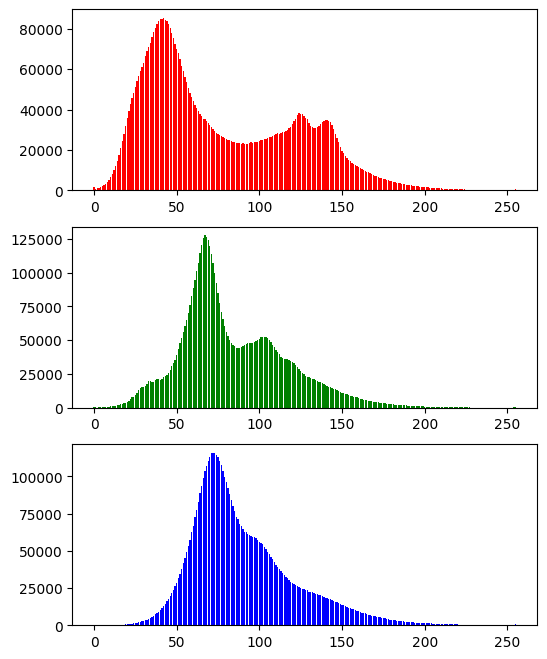

In [39]:
file_name = "Vista_satelital_santa_fe.jpg" #"bosque.jpg"
hists, bines = hist(path+file_name)
plt.figure(figsize=(6, 8))
c = ['r', 'g', 'b']

for i in range(hists.shape[0]):
  ax = plt.subplot(hists.shape[0], 1, i+1)
  ax.bar(bines, hists[i,:], color=c[i])

##9. Implementar una función que aplique un umbral a cada banda de una imagen, devolviendo una imagen binaria para cada una.

In [40]:
def aplicarumbral(pixel, umbral): # Se aplica el umbral a cada píxel de una banda de la imagen. Si el valor del píxel es mayor que el umbral, se establece como 255 (blanco), de lo contrario, se establece como 0 (negro). Esto crea una imagen binaria donde los píxeles están completamente blancos o completamente negros según el umbral especificado.
    if pixel > umbral:
      return 255
    else:
      return 0

def funcionumbral(imagen, umbral):
    im = Image.open(imagen)
    bandas = im.split() # Split this image into individual bands. This method returns a tuple of individual image bands from an image. For example, splitting an “RGB” image creates three new images each containing a copy of one of the original bands (red, green, blue).
    imagenesbinarias = []

    for banda in bandas:
       imagenbinaria = banda.point(lambda pixel: aplicarumbral(pixel, umbral)) # .point permite aplicar una transformación a cada píxel de la imagen utilizando una función lambda.
       imagenesbinarias.append(imagenbinaria)
    
    return imagenesbinarias

In [54]:
# Ruta de la imagen de ejemplo
rutaimagen = path+"flores.jpg"

# Aplicamos el umbral a cada banda de la imagen
umbral = 100
imagenesbinarias = funcionumbral(rutaimagen, umbral)

for _, imagenbinaria in enumerate(imagenesbinarias):
    imagenbinaria.show()

##10. Implementar una función que realice la ecualización del histograma para mejorar la imagen, realizar la operación banda por banda y en la imagen del  índice NDVI, observar los resultados.

In [42]:
def equalize_histogram(image):
  
    # Verificamos si la imagen es en color
    if len(image.shape) == 3:
        # Inicializamos una lista para almacenar las bandas ecualizadas
        equalized_bands = []
        
        # Iteramos sobre cada banda de color
        for i in range(image.shape[2]):
            # Aplicamos ecualización de histograma a cada banda por separado
            equalized_band = cv2.equalizeHist(image[:, :, i])
            equalized_bands.append(equalized_band)
        
        # Convertimos la lista de bandas ecualizadas a un arreglo numpy
        equalized_image = np.stack(equalized_bands, axis=2)
    else:
        # Si la imagen es en escala de grises, aplicamos ecualización de histograma directamente
        equalized_image = cv2.equalizeHist(image)
    
    return equalized_image

In [43]:
image = cv2.imread(path+'LC08_224-078_2018-01-05_nir.tif')[:,324:718] # Las imágenes tienen dos cuadrados negros a los costados, los sacamos.
equalized_image = equalize_histogram(image)

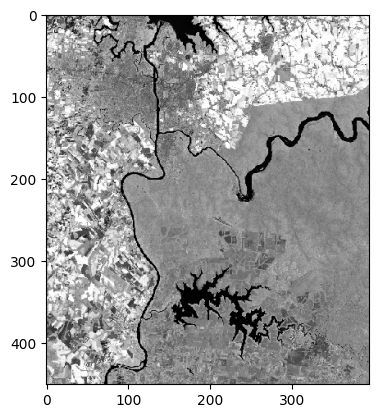

In [44]:
plt.imshow(image)

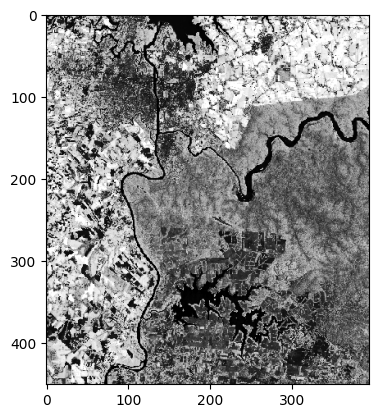

In [45]:
plt.imshow(equalized_image)

In [46]:
# Aplicamos la ecualización a la imagen NDVI

# Primero transformamos los datos de la imagen NDVI (que es un numpy array) a unit8, para despues poder transformarla a una imagen de cv2
ndvi8 = np.uint8(ndvi)
ndvi_cv2 = cv2.cvtColor(ndvi8, cv2.COLOR_GRAY2BGR)
# Ahora ecualizamos:
equalized_NDVI = equalize_histogram(ndvi_cv2)

C:\Users\Bianca\AppData\Local\Temp\ipykernel_12444\2529406758.py:4: RuntimeWarning: invalid value encountered in cast
  ndvi8 = np.uint8(ndvi)


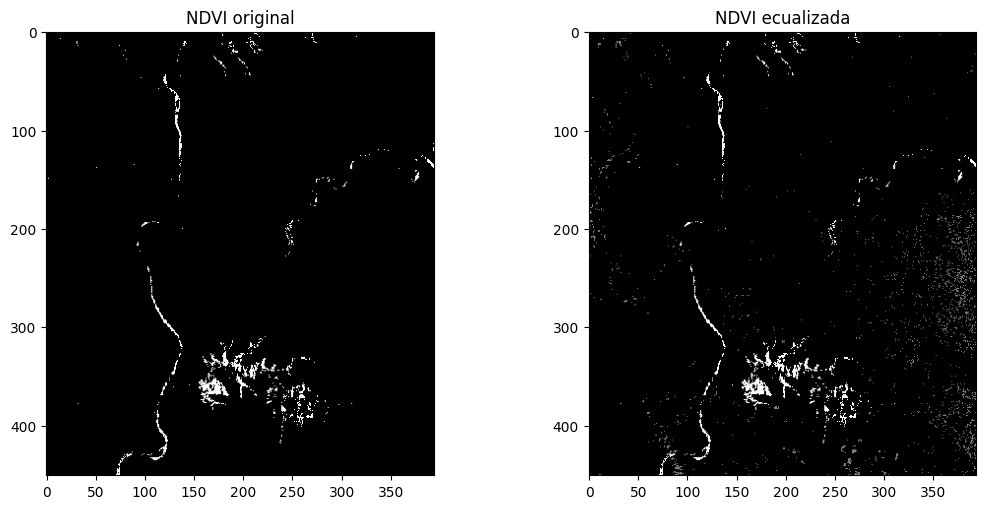

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ndvi_cv2)
axes[0].set_title('NDVI original')

axes[1].imshow(equalized_NDVI)
axes[1].set_title('NDVI ecualizada')

plt.subplots_adjust(wspace=0.4)

##11. Implementar un generador de ruido impulsivo (Sal y Pimienta) de densidad variable, aplicarlo una imagen.

In [48]:
def add_salt_and_pepper_noise(image_input, density):
    image = np.copy(image_input)

    # Dimensiones de la imagen
    height, width, channels = image.shape

    # Cantidad de pixeles que van a ser afectados por el ruido
    num_pixels = int(height * width * density)

    # Generamos indices random para los pixeles que van a tener ruido sal
    salt_height_indices = np.random.randint(0, height, int(num_pixels/2)) # Dividimos a los números de pixels que van a ser afectados por 2, porque la mitad van a ser sal, y la mitad pimienta
    salt_width_indices = np.random.randint(0, width, int(num_pixels/2))

    # Aplicamos ruido sal a los pixeles seleccionados al azar
    image[salt_height_indices, salt_width_indices] = [255, 255, 255]

    # Generamos indices random para los pixeles que van a tener ruido pimienta
    pepper_height_indices = np.random.randint(0, height, int(num_pixels/2)) # Dividimos a los números de pixels que van a ser afectados por 2, porque la mitad van a ser sal, y la mitad pimienta
    pepper_width_indices = np.random.randint(0, width, int(num_pixels/2))

    # Aplicamos ruido pimienta a los pixeles seleccionados al azar
    image[pepper_height_indices, pepper_width_indices] = [0, 0, 0]

    return image

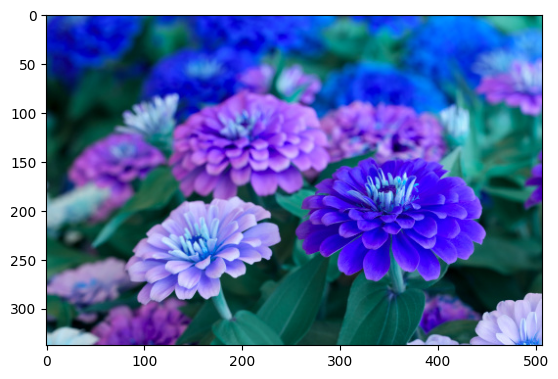

In [53]:
image = cv2.imread(path+'flores.jpg')
plt.imshow(image)

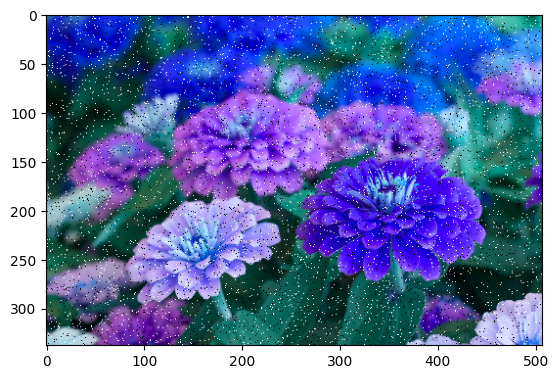

In [56]:
# Agregamos ruido sal y pimienta de densidad 0.05 (5%)
noisy_image = add_salt_and_pepper_noise(image, density=0.05)
plt.imshow(noisy_image)

##12. Implementar una ventana deslizante que pueda aplicarse a una imagen con máscaras de tamaño variable, cuadrada y aplicar a una imagen las siguientes mascaras:

##12a. Suavizado con el filtro de la media.

In [57]:
def apply_sliding_window(image, filter_type, window_size):
    # Dimensiones de la imagen
    height, width = image.shape[:2]

    # Calculamos el tamaño del padding según el tamaño de la ventana
    padding = window_size // 2

    # Aplicamos padding a la imagen
    padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE) # El parámetro cv2.BORDER_REPLICATE sirve para que los bordes agregados con el padding sean iguales a los bordes de la imagen

    # Creamos una copia de la imagen original para guardar el resultado
    result = np.copy(image)

    # Recorremos la imagen con la ventana deslizante
    for y in range(height):
        for x in range(width):
            # Obtener la región de interés (ROI: region of intrest) dentro de la ventana
            roi = padded_image[y:y+window_size, x:x+window_size]

            # Calculamos la media de la ROI
            filtered_image = filter_type(roi) # El filter_type va a ser np.mean, o np.median

            # Asignamos el valor promedio a la ubicación correspondiente en la imagen resultante
            result[y, x] = filtered_image

    return result

In [58]:
# Abrimos la imagen (de cualquier cantidad de bandas)
image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]

# Especificamos el tamaño de la ventana (por ejemplo, 5 para una ventana 5x5)
window_size = 5

# Aplicamos la ventana deslizante para suavizar la imagen con el filtro de media
# Aplicamos el filtro a cada una de las bandas por separado
# Y después stackeamos todas las bandas ya filtradas para tener la imagen multibanda ya filtrada
smoothed_image_mean = np.zeros(image.shape)
for i in range(image.shape[2]):
    smoothed_image_mean[:,:,i] = apply_sliding_window(image[:,:,i], np.mean, window_size) # Aca pedimos que el filter_type sea la media (np.mean)

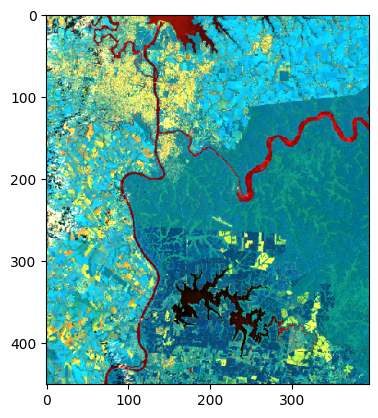

In [60]:
# Imagen original:
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


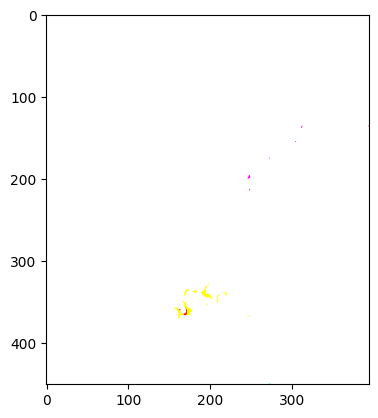

In [61]:
plt.imshow(smoothed_image_mean)

##12b. Suavizado con el filtro de la mediana.

In [62]:
# Usamos la misma función apply_sliding_window pero usando la mediana como filter_type
image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')
window_size = 5
smoothed_image_median = np.zeros(image.shape)
for i in range(image.shape[2]):
    smoothed_image_median[:,:,i] = apply_sliding_window(image[:,:,i], np.median, window_size) # Aca pedimos que el filter_type sea la mediana (np.median)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


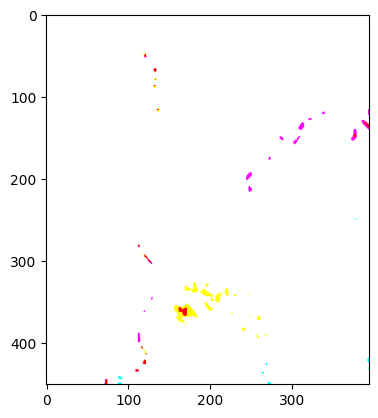

In [64]:
plt.imshow(smoothed_image_median)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Imagen con ruido sal y pimienta


Imagen con ruido sal y pimienta luego de ser filtrada con el filtro de la mediana


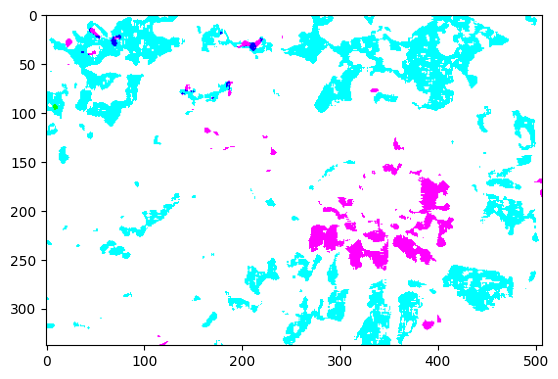

In [66]:
# Pruebo usar el filtro de la mediana en una imagen con ruido sal y pimienta, donde se supone que este filtro funciona muy bien

image = cv2.imread(path+'flores.jpg')
noisy_image = add_salt_and_pepper_noise(image, density=0.05)
window_size = 5
smoothed_image_median = np.zeros(image.shape)
for i in range(noisy_image.shape[2]):
    smoothed_image_median[:,:,i] = apply_sliding_window(noisy_image[:,:,i], np.median, window_size)

print("\nImagen con ruido sal y pimienta\n")
plt.imshow(noisy_image)
print("\nImagen con ruido sal y pimienta luego de ser filtrada con el filtro de la mediana")
plt.imshow(smoothed_image_median)

##12c. Suavizado con el filtro de la mediana ponderada de 3x3.

In [67]:
weights = np.array([[1, 2, 1], # Ponemos estos pesos en la máscara
                    [2, 4, 2],
                    [1, 2, 1]])

def ponderated_median_3x3(roi):
    return np.median(np.repeat(roi.flatten(), weights.flatten())) # Creamos un vector que tenga repetidos los elementos de la región de interés según indique la máscara, y después tomamos la mediana

In [68]:
image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')
window_size = 3 # Aca tiene que ser 3 si o si
smoothed_image_median_ponderated = np.zeros(image.shape)
for i in range(image.shape[2]):
    smoothed_image_median_ponderated[:,:,i] = apply_sliding_window(image[:,:,i], ponderated_median_3x3, window_size) # Aca pedimos que el filter_type sea la mediana ponderada de 3x3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


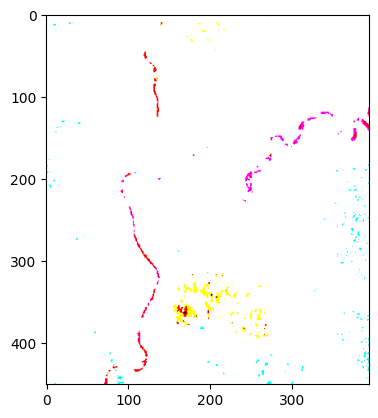

In [69]:
plt.imshow(smoothed_image_median_ponderated)

##12d. Suavizado con el filtro de Gauss para diferentes valores de σ y μ = 0.

In [70]:
# Este filtro vamos a aplicarlo con una función predefinida en OpenCV
# Pero podríamos programarlo muy similar al punto anterior, solo que cambiando la máscara para que fuera gaussiana y reemplazando la función de mediana por la de la suma

image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')
size = 5 # Tamaño de la ventana deslizante (si es 5, entonces es una ventana de 5x5)
sigma = 1 # Sigma de la gaussiana
blurred_image = cv2.GaussianBlur(image, (size, size), sigma) # Esta función aplica el filtro de la gaussiana. Por default usa una gaussiana con media nula.

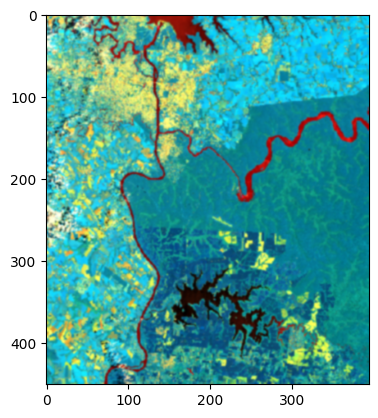

In [71]:
plt.imshow(blurred_image)

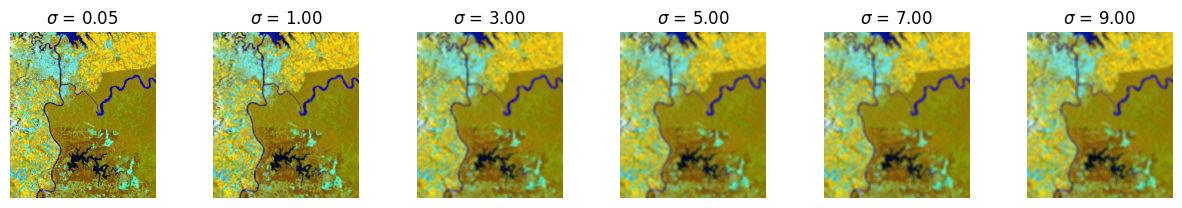

In [72]:
# Para un tamaño fijo de ventana, graficamos la imagen filtrada con diferentes sigmas

image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')
size = 9
sigma_values = np.array([0.05, 1, 3, 5, 7, 9])

fig, axes = plt.subplots(1, len(sigma_values), figsize=(15, 5))
fig.subplots_adjust(wspace=0.4)

# Iteramos por los valores de sigma
for i, sigma in enumerate(sigma_values):
    # Aplicamos el filtrado gaussiano a la imagen
    sigma_image = cv2.GaussianBlur(image, (size, size), sigma)

    # Graficamos la imagen
    ax = axes[i]
    ax.imshow(cv2.cvtColor(sigma_image, cv2.COLOR_BGR2RGB))
    ax.set_title('$\u03C3$ = {:.2f}'.format(sigma))
    ax.axis('off')
    img.set_visible(False)  # Escondemos las colorbars

##12e. Realce de Bordes

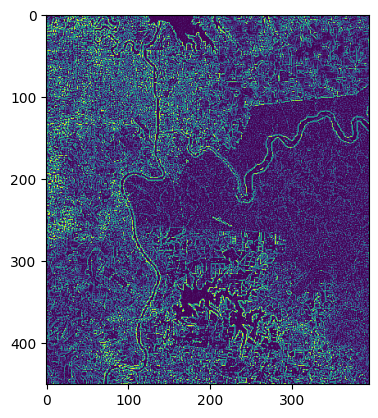

In [74]:
# Usamos un filtro pasaaltos

weights = np.array([[-1, -1, -1], # Ponemos los pesos correspondientes al filtro pasaaltos
                    [-1, 8, -1],
                    [-1, -1, -1]])

image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Pasamos a escala de grises
# Pasamos la máscara usando un filtro deslizante
# Esta función de OpenCV pasa directamente el filtro sin que tengamos que programarlo explícitamente
filtered_image = cv2.filter2D(image, -1, weights) # Con el -1 pedimos que el output utilice la misma cantidad de bits para representar un pixel que el input
plt.imshow(filtered_image)

##13. Implementar el detector de bordes por el método del gradiente utilizando los siguientes operadores de gradiente:

##13a. Prewitt.

In [75]:
def prewitt(image):
    # Convertimos la imagen a escala de grises
    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicamos el operador de Prewitt para calcular los gradientes de la imagen
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    gradiente_x = cv2.filter2D(gris, -1, kernel_x) # Esto aplica como ventana deslizante la máscara definida por prewitt en la dirección x
    gradiente_y = cv2.filter2D(gris, -1, kernel_y) # Lo mismo pero en la dirección y
                                                   # Con el -1 pedimos que el output utilice la misma cantidad de bits para representar un pixel que el input

    # Calculamos el valor absoluto del gradiente en cada dirección
    abs_gradiente_x = np.abs(gradiente_x)
    abs_gradiente_y = np.abs(gradiente_y)

    # Sumamos ponderadamente los valores absolutos de los gradientes en cada dirección
    gradiente_sum = cv2.addWeighted(abs_gradiente_x, 0.5, abs_gradiente_y, 0.5, 0) # Esto basicamente significa que tomamos la media entre el gradiente en las dos direcciones
                                                                                   # Es una suma ponderada de ambos gradientes, donde ambos están pesados por el factor 0.5, lo cual es equivalente a la media
                                                                                   # El 0 del final indica que no se suma ninguna constante extra a la suma ponderada

    # Normalizamos la imagen resultante para ajustar su rango de valores
    im_bordes = cv2.normalize(gradiente_sum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # El None es porque se crea una nueva imagen de salida, en lugar de reescribir el input
                                                                                       # El 0 y el 255 es porque ese es el rango que queremos que tenga la nueva imagen
                                                                                       # cv2.NORM_MINMAX indica que realizaremos una normalización de tipo min-max
                                                                                       # cv2.CV_8U es el tipo de datos del output, que es un tipo de datos de 8 bits sin signo

    return im_bordes


Imagen original


Imagen con realce de bordes



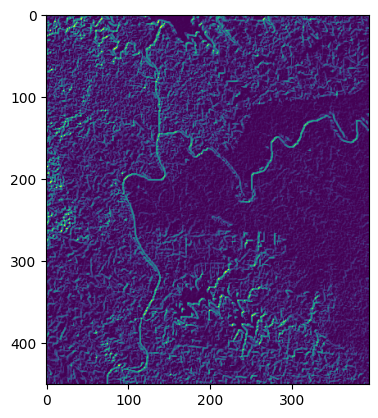

In [76]:
# Cargamos la imagen
image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')

# Aplicamos el filtro de ventana deslizante para realce de bordes
im_bordes = prewitt(image)

# Mostramos la imagen original y la imagen con realce de bordes
print("\nImagen original\n")
plt.imshow(image)
print("\nImagen con realce de bordes\n")
plt.imshow(im_bordes)

##13b. Sobel.

In [77]:
def sobel(image):
    # Convertimos la imagen a escala de grises
    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicamos el operador de Sobel para calcular los gradientes de la imagen
    gradiente_x = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3) # cv2.CV_64F es para tener una precisión de punto flotante de 64 bits.
                                                             # 1,0: derivada en x. 0,1: derivada en y.
                                                             # ksize es el tamaño del kernel, el tamaño de la ventana

    # Calculamos el valor absoluto del gradiente en cada dirección
    abs_gradiente_x = np.abs(gradiente_x)
    abs_gradiente_y = np.abs(gradiente_y)

    # Sumamos ponderadamente los valores absolutos de los gradientes en cada dirección
    gradiente_sum = cv2.addWeighted(abs_gradiente_x, 0.5, abs_gradiente_y, 0.5, 0)

    # Normalizamos la imagen resultante para ajustar su rango de valores
    im_bordes = cv2.normalize(gradiente_sum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return im_bordes


Imagen original


Imagen con realce de bordes usando Sobel



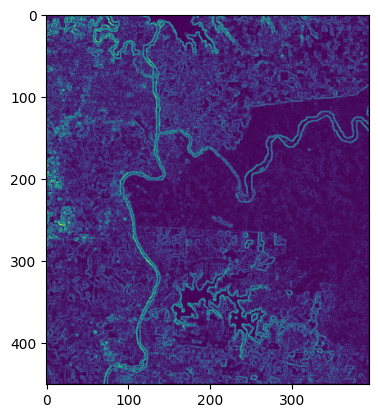

In [79]:
# Cargamos la imagen
image = cv2.imread(path+'LC08_224-078_2018-01-05_RGB.tif')[:,324:718]#(path+'flores.jpg')

# Aplicamos el filtro de ventana deslizante para realce de bordes
im_bordes = sobel(image)

# Mostramos la imagen original y la imagen realzada
print("\nImagen original\n")
plt.imshow(image)
print("\nImagen con realce de bordes usando Sobel\n")
plt.imshow(im_bordes)

##14. Clasificar una imagen utilizando métodos de clasificacién supervisada, cortando regiones para entrenar de ciudad, selva y agua. Separar el conjunto de muestra en conjunto de entrenamiento y conjunto de testeo. Clasificar utilizando el método SVM y calcular la matriz de confusión. Aplicar el método ya entrenado para clasificar la imagen completa.

In [80]:
im = Image.open(path+"LC08_224-078_2018-01-05_RGB.tif")
im = im.crop((324,0,718,451)) # Le recortamos los rectángulos blancos a los costados de la imagen
print('\nImagen original\n')
im.show()

# Realizamos el recorte de regiones para entrenamiento
region_selva = im.crop((286,170,391,270))
print('\nZona de selva\n')
region_selva.show()
region_ciudad = im.crop((0,300,105,400))
print('\nZona de ciudad\n')
region_ciudad.show()
region_agua = im.crop((158,0,178,25))
print('\nZona de agua\n')
region_agua.show()


Imagen original


Zona de selva


Zona de ciudad


Zona de agua



In [81]:
region_ciudad_array = np.array(region_ciudad)
region_selva_array = np.array(region_selva)
region_agua_array = np.array(region_agua)

# Reesctructuramos los datos para que tengan la siguiente forma:
# Cantidad de filas = Cantidad de píxeles
# Cantidad de columnas = Cantidad de bandas de la imagen

sc = region_ciudad_array.shape
features_ciudad = region_ciudad_array.reshape(sc[0]*sc[1], sc[2])

ss = region_selva_array.shape
features_selva = region_selva_array.reshape(ss[0]*ss[1], ss[2])

sa = region_agua_array.shape
features_agua = region_agua_array.reshape(sa[0]*sa[1], sa[2])

In [82]:
# Etiquetamos las características - np.full: return a new array of a given shape and data type filled with fill_value
labels_ciudad = np.full(np.shape(features_ciudad)[0], "ciudad")
labels_selva = np.full(np.shape(features_selva)[0], "selva")
labels_agua = np.full(np.shape(features_agua)[0], "agua")

In [83]:
# Concatenamos las características y etiquetas
features = np.concatenate((features_ciudad, features_selva, features_agua))
labels = np.concatenate((labels_ciudad, labels_selva, labels_agua))

In [84]:
# Separamos los datos en train y test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [85]:
# Entrenamiento del clasificador SVM
classifier = svm.SVC()
classifier.fit(features_train, labels_train)

# Evaluación del modelo (matriz de confusión)
predictions = classifier.predict(features_test)
confusion = confusion_matrix(labels_test, predictions)
print(confusion)

[[ 100    1    0]
 [   1 2012   98]
 [   0   35 2053]]


In [86]:
# Resultados del calsificador:

# Para la clase "agua" (primera fila de la matriz de confusión):

# Se clasificaron correctamente 100 muestras como "agua".
# Se clasificó erróneamente 1 muestra como "ciudad" y ninguna muestras como "selva".

# Para la clase "ciudad" (segunda fila de la matriz de confusión):

# Se clasificaron correctamente 2012 muestras como "ciudad".
# Se clasificó erróneamente 1 muestras como "agua" y 98 muestras como "selva".

# Para la clase "selva" (tercera fila de la matriz de confusión):

# Se clasificaron correctamente 2053 muestras como "selva".
# Se clasificó erróneamente 0 muestras como "agua" y 35 muestras como "ciudad".

In [87]:
# Accuracy
accuracy_score(labels_test, predictions)

0.9686046511627907

In [88]:
# Ahora aplicamos el método ya entrenado para clasificar la imagen completa

ima = np.array(im)
s = ima.shape
ima = ima.reshape(s[0]*s[1],s[2])

output = classifier.predict(ima)
output = output.reshape(s[0],s[1])
output

array([['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad'],
       ...,
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'selva', 'selva'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad']],
      dtype='<U6')

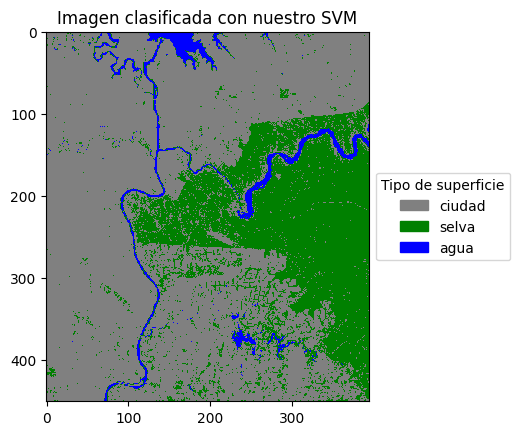

In [89]:
# Listo, terminamos.
# Pero para ver cómo dio el modelo, graficamos el output y vemos si tiene una forma similar a lo que esperaríamos

# Mapeo de etiquetas a números
output_mapping = { 'ciudad': 0,
                   'selva': 1,
                   'agua': 2 }

# Convertimos las etiquetas a números
output_numeric = np.vectorize(output_mapping.get)(output)

# Colores correspondientes a cada etiqueta
colors = ['gray', 'green', 'blue']
cmap = ListedColormap(colors)

# Graficamos el vector output
plt.imshow(output_numeric, cmap=cmap)
plt.title('Imagen clasificada con nuestro SVM')

output_labels = list(output_mapping.keys())
output_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(output_handles, output_labels, title='Tipo de superficie', loc='center left', bbox_to_anchor=(1, 0.5))

In [90]:
# Mirando el gráfico de arriba vemos que la clasifiación está bastante bien.

##15. Aplicar el método SVM a la imagen del índice NDVI realizando los mismos pasos que elejercicio 14 y comparar.

In [91]:
ndviim = Image.fromarray(np.uint8(ndvi * 255))
print('\nImagen original\n')
ndviim.show()

# Realizamos el recorte de regiones para entrenamiento
region_selva = ndviim.crop((286,170,391,270))
print('\nZona de selva\n')
region_selva.show()
region_ciudad = ndviim.crop((0,300,105,400))
print('\nZona de ciudad\n')
region_ciudad.show()
region_agua = ndviim.crop((158,0,178,25))
print('\nZona de agua\n')
region_agua.show()

C:\Users\Bianca\AppData\Local\Temp\ipykernel_12444\4082885946.py:1: RuntimeWarning: invalid value encountered in cast
  ndviim = Image.fromarray(np.uint8(ndvi * 255))



Imagen original


Zona de selva


Zona de ciudad


Zona de agua



In [92]:
region_ciudad_array = np.array(region_ciudad)
region_selva_array = np.array(region_selva)
region_agua_array = np.array(region_agua)

# Reesctructuramos los datos para que tengan la siguiente forma:
# Cantidad de filas = Cantidad de píxeles
# Cantidad de columnas = Cantidad de bandas de la imagen

sc = region_ciudad_array.shape
features_ciudad = region_ciudad_array.reshape(sc[0]*sc[1])

ss = region_selva_array.shape
features_selva = region_selva_array.reshape(ss[0]*ss[1])

sa = region_agua_array.shape
features_agua = region_agua_array.reshape(sa[0]*sa[1])

In [93]:
# Etiquetamos las características - np.full: return a new array of a given shape and data type filled with fill_value
labels_ciudad = np.full(np.shape(features_ciudad)[0], "ciudad")
labels_selva = np.full(np.shape(features_selva)[0], "selva")
labels_agua = np.full(np.shape(features_agua)[0], "agua")

In [94]:
# Concatenamos las características y etiquetas
features = np.concatenate((features_ciudad, features_selva, features_agua))
labels = np.concatenate((labels_ciudad, labels_selva, labels_agua))

In [95]:
# Separamos los datos en train y test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [96]:
features_train = features_train.reshape(-1, 1)
features_test = features_test.reshape(-1, 1)

In [97]:
# Entrenamiento del clasificador SVM
classifier = svm.SVC()
classifier.fit(features_train, labels_train)

# Evaluación del modelo (matriz de confusión)
predictions = classifier.predict(features_test)
confusion = confusion_matrix(labels_test, predictions)
print(confusion)

[[ 100    0    1]
 [  81 1754  276]
 [   1  547 1540]]


In [98]:
# Resultados del calsificador:

# Para la clase "agua" (primera fila de la matriz de confusión):

# Se clasificaron correctamente 100 muestras como "agua".
# Se clasificó erróneamente 0 muestra como "ciudad" y 1 muestras como "selva".

# Para la clase "ciudad" (segunda fila de la matriz de confusión):

# Se clasificaron correctamente 1754 muestras como "ciudad".
# Se clasificaron erróneamente 81 muestras como "agua" y 276 muestras como "selva".

# Para la clase "selva" (tercera fila de la matriz de confusión):

# Se clasificaron correctamente 1540 muestras como "selva".
# Se clasificaron erróneamente 1 muestras como "agua" y 547 muestras como "ciudad".

In [99]:
# Lo que muestra la matriz de confusion es que ahora el metodo se confunde más que antes entre selva y ciudad.
# Y varios pixeles de ciudad los calsifica como agua.
# Sigue distinguiendo bien el agua y no confundiendola con los otros tipos de superficie porque tiene valores de NDVI muy bajos.

In [100]:
# Accuracy
accuracy_score(labels_test, predictions)

0.7893023255813953

In [101]:
# Ahora aplicamos el método ya entrenado para clasificar la imagen completa

ima = np.array(ndviim)
s = ima.shape
ima = ima.reshape(s[0]*s[1])
ima = ima.reshape(-1, 1)

output = classifier.predict(ima)
output = output.reshape(s[0],s[1])
output

array([['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'selva'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'agua', 'selva', 'ciudad'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'selva', 'ciudad', 'ciudad'],
       ...,
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'selva', 'selva'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad'],
       ['ciudad', 'ciudad', 'ciudad', ..., 'ciudad', 'ciudad', 'ciudad']],
      dtype='<U6')

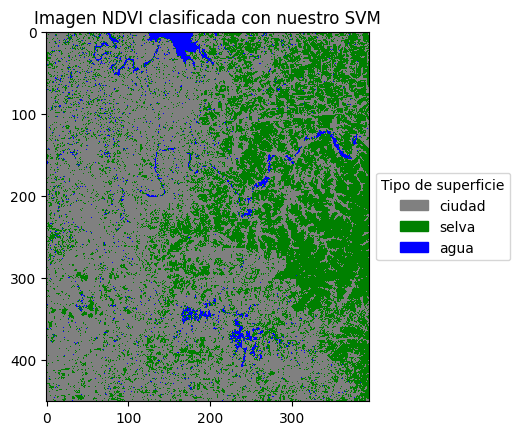

In [102]:
# Listo, terminamos.
# Pero para ver cómo dio el modelo, graficamos el output y vemos si tiene una forma similar a lo que esperaríamos

# Mapeo de etiquetas a números
output_mapping = { 'ciudad': 0,
                   'selva': 1,
                   'agua': 2 }

# Convertimos las etiquetas a números
output_numeric = np.vectorize(output_mapping.get)(output)

# Colores correspondientes a cada etiqueta
colors = ['gray', 'green', 'blue']
cmap = ListedColormap(colors)

# Graficamos el vector output
plt.imshow(output_numeric, cmap=cmap)
plt.title('Imagen NDVI clasificada con nuestro SVM')

output_labels = list(output_mapping.keys())
output_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(output_handles, output_labels, title='Tipo de superficie', loc='center left', bbox_to_anchor=(1, 0.5))

In [103]:
# Se ve claramente que la clasificación con la imagen NDVI es peor que en el caso anterior.